# Plot radio observations from multiple space and ground based instruments

Load in relevant python packages

In [1]:
import datetime as datetime
import matplotlib.pyplot as plt
import numpy.ma as ma
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.patheffects as path_effects
import matplotlib.dates as dates

Load in functions to aid in plotting

In [2]:
def prep_axis_for_time(ax):
	ax.xaxis_date()
	ax.xaxis.set_major_locator(dates.MinuteLocator(interval=10))
	ax.xaxis.set_minor_locator(dates.MinuteLocator(interval=5))
	ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))

def fix_year(date_limit):
	date_limit_fixed=dates.date2num(dates.num2date(date_limit).replace(year= 2017))
	date_limit_fixed=dates.date2num(dates.num2date(date_limit_fixed).replace(day= 2))
	return(date_limit_fixed)


Define relevant time and plot details

In [3]:
# X limits
begin_time=datetime.datetime(2017,9,2,15,20,0)
finish_time=datetime.datetime(2017,9,2,16,30,0)

#position of label
label_position = datetime.datetime(2017,9,2,15,21,0)

#colormap and font
cmap = 'Spectral_r'
font_white = {'size': 12, 'color':'white','weight':'bold'}


Load in data from WIND/WAVES RAD 1 & 2, I-LOFAR and ORFEES.

In [4]:
######################################################
#--------------LOAD DATA----------------------------#
######################################################

#WIND RAD 1
wind_rad1=np.load('wind_rad1.npy',allow_pickle=True)
windr1_data,windr1_start_time, windr1_end_time=wind_rad1[0],wind_rad1[1],wind_rad1[2]
windr1_start_time, windr1_end_time=fix_year(windr1_start_time), fix_year(windr1_end_time)

#WIND RAD 1
wind_rad2=np.load('wind_rad2.npy',allow_pickle=True)
windr2_data_raw,windr2_start_time,windr2_end_time,windr2_start_freq,windr2_end_freq=wind_rad2[0],wind_rad2[1],wind_rad2[2],wind_rad2[3],wind_rad2[4]
windr2_data=ma.masked_invalid( windr2_data_raw )
windr2_start_time, windr2_end_time=fix_year(windr2_start_time), fix_year(windr2_end_time)


#ORFEE 
orfee=np.load('orfee.npy',allow_pickle=True)
orfee_data,orfee_start_time, orfee_end_time,orf_start_freq,orf_end_freq=orfee[0],orfee[1],orfee[2],orfee[3],orfee[4]
orfee_start_time, orfee_end_time=fix_year(orfee_start_time), fix_year(orfee_end_time)

lofar_data=np.load('lofar_80_14.npy',allow_pickle=True)
start_time_lofar_obs=datetime.datetime(2017,9,2,10,36,26)
lof_time_index_start=begin_time-start_time_lofar_obs 
lof_time_index_end=finish_time-start_time_lofar_obs 
lofar_data=lofar_data[:,lof_time_index_start.seconds:lof_time_index_end.seconds]


Plot data 

In [5]:

#WIND rad 1
######################################################
plt.figure(figsize=(10,14))
ax_wr1=plt.subplot2grid( (4,1),(0,0), colspan=1, rowspan=1)
ax_wr1.imshow(windr1_data, aspect = 'auto', cmap = cmap,vmin=0,vmax=18,extent=(windr1_start_time, windr1_end_time,1.040,0.02))
text=ax_wr1.text(label_position, 0.18, 'WIND/WAVES RAD1', fontdict=font_white)
text.set_path_effects([path_effects.Stroke(linewidth=1, foreground='black'),
                       path_effects.Normal()])
prep_axis_for_time(ax_wr1)
plt.xlim(begin_time,finish_time)
plt.ylim(1,0.02)
ax_wr1.set_yticks([.05,.5], minor=True)
ax_wr1.yaxis.set_ticks([.1,1], minor=False)






In [6]:

######################################################
#WIND rad 2
######################################################
ax_wr2=plt.subplot2grid( (4,1),(1,0), colspan=1, rowspan=1)
plt.imshow(windr2_data, aspect = 'auto', cmap = cmap,vmin=0.01,vmax=1.6,extent=(windr2_start_time,windr2_end_time,windr2_start_freq,windr2_end_freq))
text=ax_wr2.text(label_position, 1.6, 'WIND/WAVES RAD2', fontdict=font_white)
text.set_path_effects([path_effects.Stroke(linewidth=1, foreground='black'),
                       path_effects.Normal()])
prep_axis_for_time(ax_wr2)
plt.xlim(begin_time, finish_time)
ax_wr2.set_ylabel('Frequency'+'\n'+' (MHz) ', fontsize=12) # 'WIND/WAVES RAD2'+'\n' +
ax_wr2.set_yticks([np.arange(2,14)], minor=True)
ax_wr2.yaxis.set_ticks([1,5,10])
plt.ylim(13,windr2_end_freq)
ax_wr2.axhspan(13, 20, alpha=0.5, color='grey')
#plt.xticks(rotation=90,color='white')
ax_wr2.set_yscale('log')

In [7]:

######################################################
#LOFAR
######################################################
axl=plt.subplot2grid( (4,1),(2,0), colspan=1, rowspan=1)
plt.imshow(lofar_data,aspect = 'auto',cmap = cmap, vmin=0.99, vmax=1.41, extent=(dates.date2num(begin_time), dates.date2num(finish_time), 88.28,14))
text=axl.text(label_position, 25, 'I-LOFAR', fontdict=font_white)
text.set_path_effects([path_effects.Stroke(linewidth=1, foreground='black'),
                       path_effects.Normal()])
prep_axis_for_time(axl)
axl.set_xlim(begin_time, finish_time)
axl.set_yscale('log')
axl.axhspan(88, 100, alpha=0.5, color='grey')
axl.set_ylim(100,20)
axl.set_yticks([20, 30,40,50,60,70,80], minor=True)
axl.yaxis.set_ticks([20,40,80])


In [8]:

######################################################
#ORFEE
######################################################

ax_orf=plt.subplot2grid( (4,1),(3,0), colspan=1, rowspan=1)
plt.imshow(orfee_data, aspect = 'auto', cmap = cmap,vmin=100,vmax=500,extent=(orfee_start_time, orfee_end_time,orf_start_freq,orf_end_freq))
text=ax_orf.text(label_position, 150, ' ORFÉES', fontdict=font_white)
text.set_path_effects([path_effects.Stroke(linewidth=1, foreground='black'),
                       path_effects.Normal()])
prep_axis_for_time(ax_orf)
ax_orf.set_yscale('log')
ax_orf.axhspan(100, 144, alpha=0.5, color='grey')
plt.xlim(begin_time,finish_time)
plt.ylim(1000,100)
ax_orf.yaxis.set_ticks([100,500,1000])

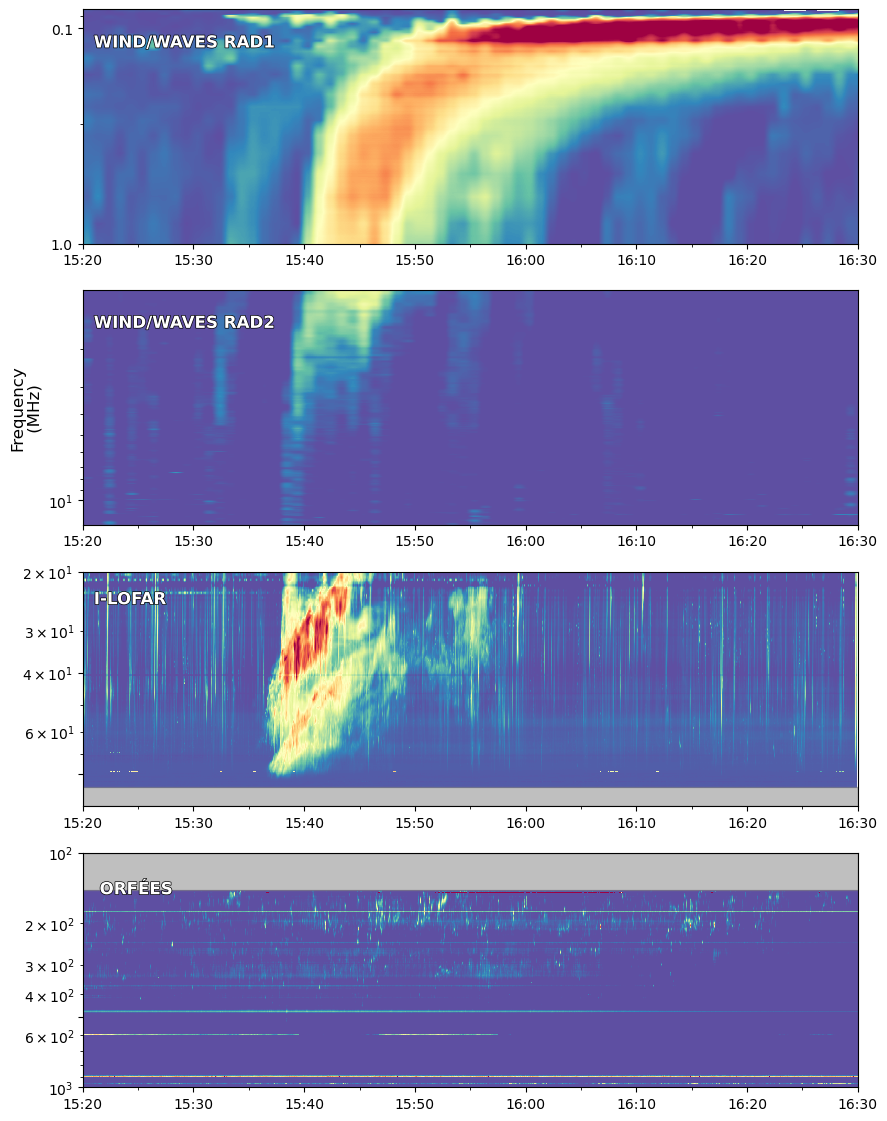

In [54]:
plt.show()